In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1499,spam,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN
461,ham,Great. Never been better. Each day gives even ...,NaN,NaN,NaN
5250,spam,Urgent! Please call 09061213237 from a landlin...,NaN,NaN,NaN
5235,ham,Am on the uworld site. Am i buying the qbank o...,NaN,NaN,NaN
1435,ham,Dad went out oredi...,NaN,NaN,NaN


In [7]:
dataset.shape

(5572, 5)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Data Cleaning

In [10]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
dataset.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [13]:
dataset.rename(columns={'v1':'target','v2':'text'}, inplace=True)
dataset.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
dataset['target']=encoder.fit_transform(dataset['target'])

In [17]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
dataset.duplicated().sum()

403

In [21]:
dataset.drop_duplicates(inplace=True)

In [22]:
dataset.duplicated().sum()

0

In [23]:
dataset.shape

(5169, 2)

# 2. EDA

In [24]:
!pip install nltk

In [33]:
import nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
dataset['num_characters']=dataset['text'].apply(len)


In [31]:
dataset.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
dataset['num_words'] = dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
dataset.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
dataset['num_sentences'] = dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
dataset[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#ham
dataset[dataset['target']==0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#spam
dataset[dataset['target']==1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

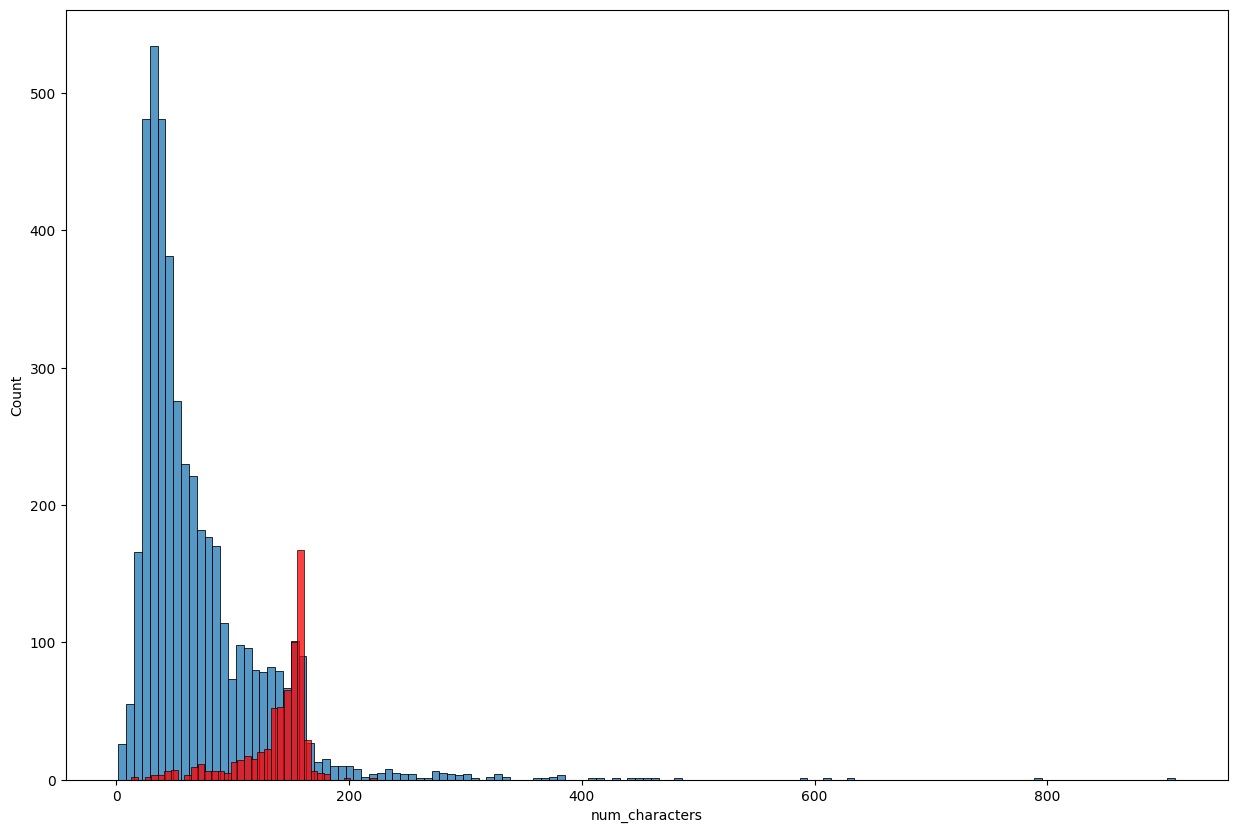

In [48]:
plt.figure(figsize=(15,10))
sns.histplot(dataset[dataset['target']==0]['num_characters'])
sns.histplot(dataset[dataset['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

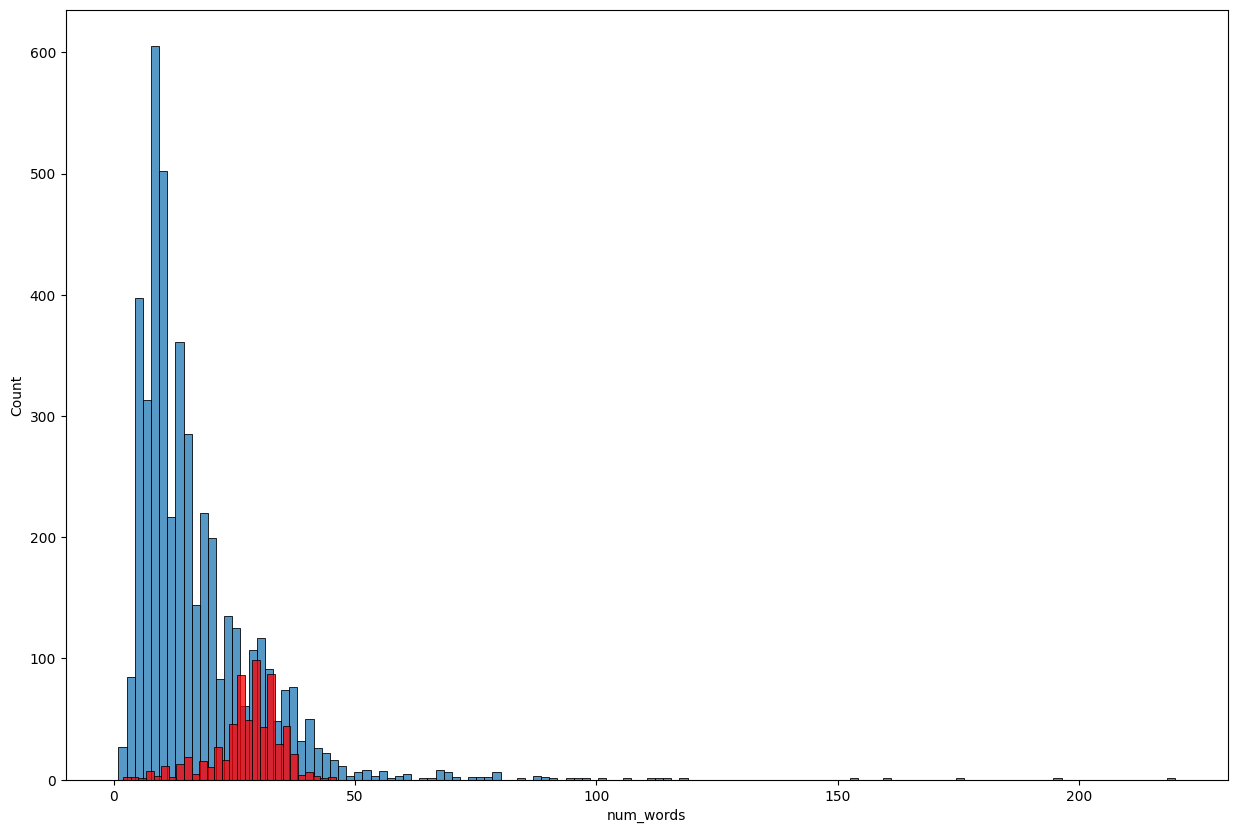

In [49]:
plt.figure(figsize=(15,10))
sns.histplot(dataset[dataset['target']==0]['num_words'])
sns.histplot(dataset[dataset['target']==1]['num_words'], color='red')

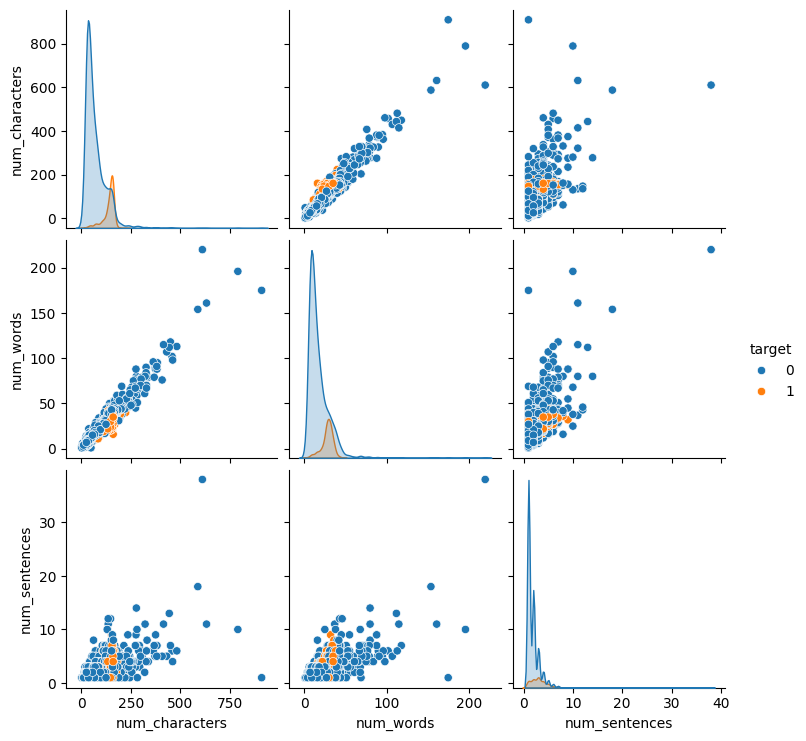

In [50]:
sns.pairplot(dataset, hue='target')

<Axes: >

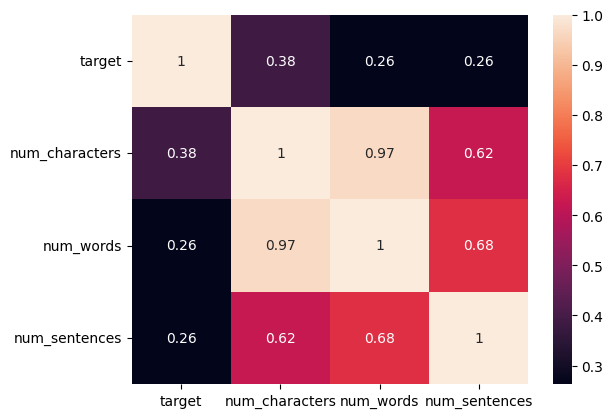

In [52]:
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True)

#Data Preprocessing
- lower case
- Tokenization
- Removing specail characters
- Removing stop words
- Stemming

In [55]:
from nltk.corpus import stopwords


In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [64]:
transform_text('I loved the lectures on youtube about Machine Learning')

'love lectur youtub machin learn'

In [66]:
dataset['transformed_text'] = dataset['text'].apply(transform_text)
dataset.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [78]:
spam_wc = wc.generate(dataset[dataset['target']==1]['transformed_text'].str.cat(sep=" "))

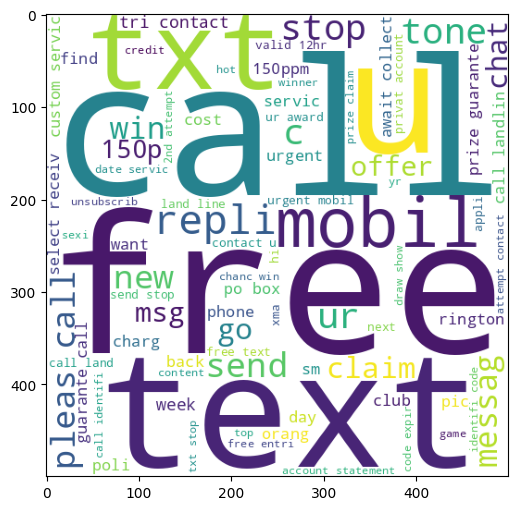

In [80]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [81]:
ham_wc = wc.generate(dataset[dataset['target']==0]['transformed_text'].str.cat(sep=" "))

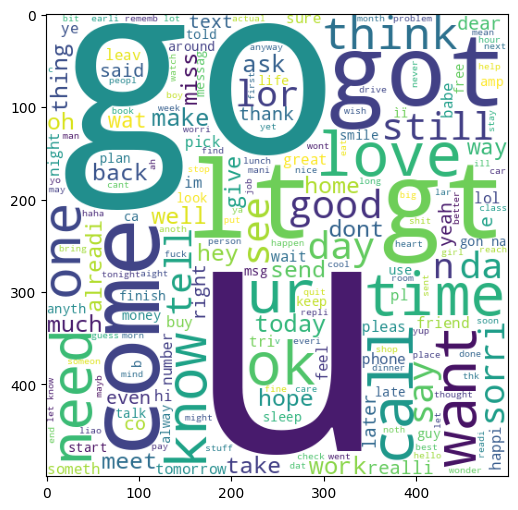

In [82]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [83]:
spam_corpus = []
for msg in dataset[dataset['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [84]:
len(spam_corpus)

9939

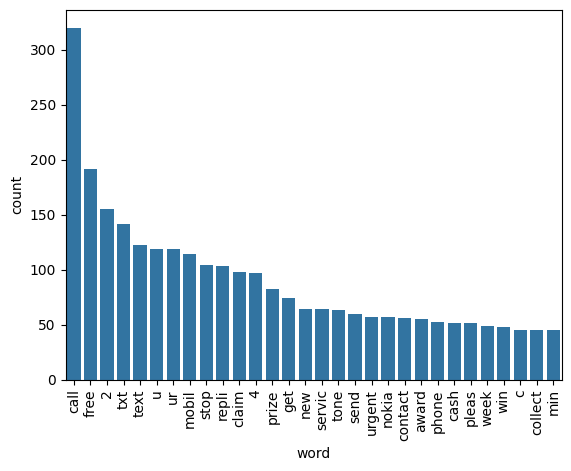

In [99]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()
spam_counter = Counter(spam_corpus).most_common(30)
pd.DataFrame(spam_counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data = pd.DataFrame(spam_counter, columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

In [98]:
ham_corpus = []
for msg in dataset[dataset['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

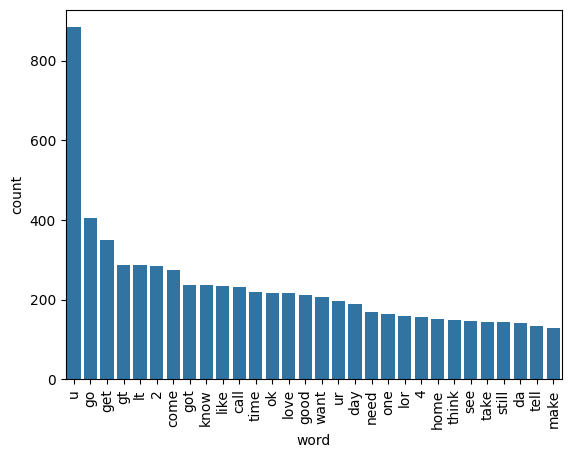

In [101]:
ham_counter = Counter(ham_corpus).most_common(30)
pd.DataFrame(ham_counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data = pd.DataFrame(ham_counter, columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [129]:
X=tfidf.fit_transform(dataset['transformed_text']).toarray()

In [130]:
y=dataset['target'].values

In [133]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 1, ..., 0, 0, 0]))

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [135]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


In [136]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [138]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [139]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [140]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [141]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))